## 交互作用を含むトイデータを作成

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
def create_toy_dataset(n=100):
    #　交互作用を含まない変数
    ind_vars = np.random.randn(n, 2)
    # 交互作用のもとになる変数
    int_var_src = np.random.randn(n, 2)
    X = np.hstack([ind_vars, int_var_src])
    y = ind_vars[:, 1] +  2 * int_var_src[:, 0] * int_var_src[:, 1]
    return X, y

X, y = create_toy_dataset(2000)

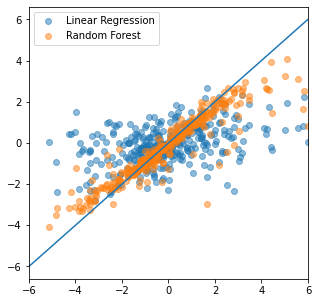

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 精度評価
fig, ax = plt.subplots(figsize=(5.0, 5.0))
ax.plot([-6, 6], [-6, 6])
ax.set_xlim([-6, 6])
ax.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
ax.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
ax.legend()
plt.show()


In [4]:
print(rf.feature_importances_)

[0.03665598 0.24377962 0.35179661 0.36776779]
